In [8]:
from IPython.core.display import HTML
display(HTML("""
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Toggle raw code on/off">
</form>"""))

In [1]:
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from pathlib import Path
import pandas as pd

from sklearn.base import clone
from scipy.spatial.distance import euclidean, cityblock
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.graph_objects as go
import plotly.express as px
from scipy.cluster.hierarchy import fcluster
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

# <div style="text-align:center" style="color:black; font-family:Helvetica">LABELLING LABOR LITIGATION</div>
<img float="center" src="images/sc.png" width="200" />

### <center><i>A review of labor cases decided by the Supreme Court of the Philippines</i></center>
<!-- <img src="amazon.png" width="300" /> -->

## <span style="color:black; font-family:Helvetica">1.0.  Executive Summary/Synopsis</span>

## <span style="color:black; font-family:Helvetica">2.0. Background, Problem Statement, and Motivation </span>

### 2.1. Background 

#### Labor Code of the Philippines

According to the 1987 Constitution of the Philippines, the State "shall afford full protection to labor, local and overseas, organized and unorganized, and promote full employment and equality of employment opportunities for all."  The provisions that protect the workers and their rights are stipulated  in the Labor Code of the Philippines. 

The Labor Code of the Philippines governs the employment practices and labor relations in the Philippines. It was enacted on May 01, 1974 (Labor Day) by President Ferdinand Marcos and took effect on November 01 of the same year. This law prescribes the rules for:
- Hiring and termination of private employees
- Conditions of work : maximum work hours and overtime , employee benefits and health and safety in the work environment.
- Guidelines in the organization and membership in labor unions
This law only covers those workers in the private sectors , overseas Filipino workers and self-employed persons and does not apply to government employees.[1]

### 2.2. Motivation and Problem Statement

#### Labor Force in the Philippines
the Philippines is among those countries that have a large available pool of qualified workers (15-64 years old) which is approximately 70 million in 2020. From that number, 43 million belongs to the labor force.[2] 

#### COVID and the Labor Force in the Philippines
Many workers lost their jobs because of the impact of COVID-19.  There was a significant decrease in the employment rate in the Philippines from January 2020 to January 2021.[3] Around 4.2 million Filipinos were reported jobless due to the impact of the pandemic.[4]

#### Problem Statement
Given this large work force in the Philippines and the increasing unemployment caused by the pandemic, despite the heavy protection of laws for labor, it is therefore important to look deeper into the causes of job displacements and potential violation of worker’s rights especially at this difficult time.

For this reason, this study aims to navigate labor cases in the Supreme Court (SC), seeking to float the general themes of issues brought up on appeal to the SC.

A limitation of this report, however, is that it does not take into consideration the effect of the pandemic on the SC cases on labor, including issues brought on appeal, but the authors hope that this gives enough insight as to the commonly litigated issues for application to potential COVID-related policies and rules whether relating to labor, or to litigation before the Supreme Court.

## <span style="color:black; font-family:Helvetica">3.0. Data Source and Description </span>

All Decisions that formed the corpus were extracted from the Philippine Supreme Court's (SC) e-Library website: https://elibrary.judiciary.gov.ph/.

After parsing each document and extracting relevant information, the resulting elements from each Decision was loaded as an individual entry (row) onto a pandas DataFrame, which has the following structure and data types:

<p><center><b>Table 1.</b> Structure of the DataFrame used in this report

| Date of decision | Case number | Case title | Deciding division | Ponente | Body | Provision(s) cited | Case URL |
| :--------------: | :---------: | :--------: | :---------------: | :-----: | :--: | :------------: | :----------: |
| datetime         | object | object | object | object | object | object | object | object| </center>

The <b>date of decision, case number, case title, deciding division, ponente,</b> and <b>body</b> were all extracted from defined portions of each Decision. As to the <b>provision(s) cited</b>, it contains Article numbers made in the <b>body</b> in reference to a provision from the Labor Code of the Philippines. <b>Case URL</b> contains the direct link to case in the Supreme Court website. Each column will be discussed in Section 4.


## <span style="color:black; font-family:Helvetica">4.0. Quick Overview of the Philippine Legal System</span>

### 4.1. Judicial Power; usual types of cases

Article VIII, Section 1 of the 1987 Constitution provides that "judicial power shall be vested in one Supreme court and in such lower courts as may be established by law."[5]

The same provision defines <i>judicial power</i> as the duty of the courts of justice to do two things:
a. settle actual controversies involving rights which are legally demandable and enforceable, and 
b. determine whether or not there has been a grave abuse of discretion amounting to lack or excess of jurisdiction on the part of any branch or instrumentality of the Government.

Actual controversies refers to existing cases or controversies that are appropriate or ripe for determination by the courts, and are not hypotheticals or conjectures. This is to avoid the court from rendering advisory opinions.[6]

### 4.2. Civil and criminal cases

Controversies are usually brought for judicial determination through the filing of cases in the appropriate court. Here are a couple of types of cases that we may be familiar with:
a. civil action - a party sues another for the enforcement or protection of a right,  or the prevention or redress of a wrong; or
b. criminal action - the State prosecutes a person for an act or omission punishable by law.[7]

Short of going through the case files themselves, a quick distinguishing feature of civil cases from criminal cases is their case titles. Owing to the characteristic of criminal actions as those brought by the State for a crime, these cases invariably have "PEOPLE OF THE PHILIPPINES" in the case title, because the peace being enjoyed by the People is disturbed by a criminal act. Civil cases do not have this feature, and usually have at least one person as the plaintiff, who seeks the enforcement or protection of a right or the prevention or redress of a wrong, and another as the defendant, whom enforcement or redress is exacted. Accused people found guilty in criminal cases are usually imprisoned and/or made to pay a fine; whereas the losing party in a civil case does not face such a penalty.

There are other types of cases in the Philippines, such as administrative cases and ethics cases, but this report only limits itself to civil and criminal actions.

### 4.3. The Supreme Court

At the highest level of the judicial system is the Supreme Court (SC) of the Philippines, which is considered "the court of last resort".[8] In addition to other situations where the Supreme Court would exercise jurisdiction over a case, the SC decides appeals from lower courts and governmment agencies exercising quasi-judicial functions. This 15-person Court, headed by a Chief Justice, deliberates on cases either in divisions of five justices each, or as a whole (called <i>en banc</i>), and issues <b>decisions</b> settling controversies, which then "form a part of the legal system of the Philippines."[9]

As Decisions by the SC become part of the law of the land, it is necessary to look at the anatomy of a Decision.

### 4.4. Anatomy of a Supreme Court Decision

<b>Figure 1</b> below shows the basic anatomy of a Supreme Court Decision. Note that this anatomy is based on the authors' understanding of a Decision, based on references. As such, other authors may provide different guides to analyzing an SC Decision.

<p float="center">
   <img src="images/decision_anatomy.png" width="600" />
 </p>

<center><b>Figure 1.</b> Anatomy of a Supreme Court Decision</center>

<p><p><b>Table 2</b> below provides a short description of the parts of the Supreme Court Decision

<center>
<br><b>Table 2.</b> Description of the identified parts of an SC Decision
    
| Part of a Decision | Description |   
| :----------------: | :--------- |
| Deciding Division | Indicates which Division decided the case |
| Case number | The unique number of the case as logged in the Court's dockets |
| Date of Decision | Date when the Decision was promulgated |
| Ponente | The name of the SC Justice who penned the Decision|
| Body | Contains the facts, procedural history, issues, applicable laws, holding with respect to an issue |
| Dispositive portion | Gives effect to the Court's decision on the case |
    
    
For purposes of this report, a reference to the `Body` of the text is actually theat of the `Body` <b>plus</b> the `dispositive portion` of the respective Decision.

## <span style="color:black; font-family:Helvetica">5.0. Methodology </span>

In the conduct of this exploratory data analysis, the following general steps were performed by the authors:
1. Data extraction, checking of values, and preprocessing
2. Dimensionality reduction (Term Frequency-Inverse Document Frequency [TF-IDF], and Latent Semantic Analysis)
3. Exploratory data analysis and visualization

###  5.1. Data extraction, checking of values, and preprocessing
#### <u> Data Scraping</u>
The Supreme Court e-Library website https://elibrary.judiciary.gov.ph/ is structured in a way that each URL leading to a specific Decision is contained in a URL for that month and year. Knowing the structure enabled the authors to setup code that recursively scrapes each decision using the `requests` library. <b>Figure 3</b> shows an example of the successive pages needed to be clicked to access a particular case.
 
<!-- ### <b> insert photo of structure here </b> -->
<p float="center">
  <img src="images/sc_structure.png" width="600" />
</p>
<center><b>Figure 2.</b> The Supreme Court e-Library landing page leading to the URLs of decisions per month</center>


All 29,150 decisions between the period of January 1996 to May 11, 2021 were downloaded and saved to local machines as HTML files.

#### <u> Database</u>

An AWS cloud RDS MySql database instance was established and used as a reference to monitor the downloading of web pages. This setup enabled the authors to download the cases faster as multiple users were able to download different cases at the same time without overlap.

<b>Figure 3</b> shows RDS MySql Instance in AWS.
<p float="center">
  <img src="images/aws_rds.png" width="800" />
</p>


<b>Figure 4</b> shows database tables that were used to track scraping SC website scraping progress.
<p float="center">
  <img src="images/database_tables.png" width="500" />
</p>



#### <u> Data Preprocessing</u>

To be able to extract the relevant data from each HTML file, the authors used `BeautifulSoup`. The `case title` and `body` of all 29,150 Decisions were converted to lowercase for searching and processing using `regex`.

To trim the amount of the corpus, the following steps were conducted:
1. Extracted Decisions whose `Body` contains the regex pattern `r'.*labor code of the philippines.*`.
2. Removed all criminal cases denoted by "people of the philippines" in the `case title`.
3. Kept only non-administrative and non-ethics cases denoted by "g.r." also in the `case title`.

The trimming process outlined above followed LT 9's procedure for their DMW final project, which was done in consultation with people knowledgeable in the field of law. Domain experts suggest that criminal, administrative, and ethics cases would best be included into the corpus only at large numbers of clusters as they may form clusters of their own. Otherwise, they may introduce noise at lower cluster numbers. 

The resuling corpus of <b>289 Decisions</b> is loaded onto a pandas DataFrame with the structure shown in <b>Figure 1</b>, and is expected to contain cases whose major issues relate to the Labor Code of the Philippines.

Further cleaning was performed to rid the `Body` of extraneous characters like `newlines` and `\xa0`.

As regards the `provision(s) cited` column, references to Labor Code provisions are prefixed with `Old` if the `Date of Decision` is prior to 2015, and `New` for those promulgated after, to accommodate the renumbering introduced by DOLE Department Advisory No. 1, series of 2015.[10]

#### <u>Pickling</u>

The resulting DataFrame was saved to a `pickle` file named `df_labor_new.pkl` to preserve its contents.

Except for preparing the `Body` for the `TfidfVectorizer` process as will be explained in the next section, no further and no other pre-processing was performed.

The code for the DataFrame instantiation is contained in the `Lab4` `module` saved as `utils.py` file.

###  5.2. Dimensionality Reduction and TF-IDF

The `TfidfVectorizer` model, contained in the `get_tfidf()` method in the `Lab4` module in `utils.py` is set as follows:
<br><br>
<center><b>Table 3.</b> Setting of the TfidfVectorizer
</center>



|parameter | setting  | reason  |
| :------: |  :-----: | :------ |
| ngram_range | (2,3) |  to get more meaningful insights from clusters could be taken, as oppposed to just using monograms | 
|token_pattern | None | the authors did their own preprocessing before the TfidfVectorizer instantiation |
| stop_words | None | the authors came up with their own list of stop words, including legal stopwords, located in the same method |
| min_df | 5 | arbitrarily set |
|max_df | 8 | arbitarily set |



The `Body` of each of the 289 Supreme Court decisions was fed to the `get_tfidf()` method, consequently the `TfidfVectorizer`, and undergoing dimensionality reduction, resulted in 424 singular values.

###  5.3. Exploratory data analysis and visualization

<b>Table 4</b> below shows the first five entries of the DataFrame containing the Supreme Court Decisions on labor.

In [3]:
df_labor = pd.read_pickle('df_labor_new.pkl')

# print('Table 4. First five entries of the DataFrame containing the Supreme Court Decisions on labor')
display(df_labor.head())

Date of decision      Case number  \
0       2013-02-20  g.r. no. 186344   
1       2013-01-21  g.r. no. 199338   
2       2013-01-16  g.r. no. 179628   
3       2013-07-10  g.r. no. 179256   
4       2013-07-08  g.r. no. 188711   

                                          Case title Deciding division  \
0  leopard security and investigation agency, pet...   SECOND DIVISION   
1  eleazar s. padillo,+ petitioner, vs. rural ban...   SECOND DIVISION   
2  the manila insurance company, inc., petitioner...   SECOND DIVISION   
3  first philippine industrial corporation, petit...    THIRD DIVISION   
4  tan brothers corporation of basilan city throu...   SECOND DIVISION   

              Ponente                                               Body  \
0           perez, j.  is an award of separation pay proper despite l...   
1  perlas-bernabe, j.  before the court is a petition for review on  ...   
2    del castillo, j.  the jurisdiction of the construction industry ...   
3         peralta, j.  this is a petition for review on          cert...   
4           perez, j.  the elements of abandonment of employment as a...   

                             Provision(s) cited  \
0                        {'Old Article 279': 1}   
1  {'Old Article 300': 4, 'Old Article 297': 5}   
2                                            {}   
3                        {'Old Article 106': 1}   
4  {'Old Article 282': 2, 'Old Article 279': 1}   

                                            Case URL  
0  https://elibrary.judiciary.gov.ph/thebookshelf...  
1  https://elibrary.judiciary.gov.ph/thebookshelf...  
2  https://elibrary.judiciary.gov.ph/thebookshelf...  
3  https://elibrary.judiciary.gov.ph/thebookshelf...  
4  https://elibrary.judiciary.gov.ph/thebookshelf...

<center><b>Table 4.</b> First five entries of the DataFrame containing the Supreme Court Decisions on labor</center>


<b>Figure 3</b> below shows the trend of Labor Code cases that go up the Supreme Court. The number saw a general peak from 2005-2009, with the highest at 23 cases. Other years saw a smaller number of cases on the Labor Code being decided by the Supreme Court.

In [4]:
figure3(df_labor)

<center><b>Figure 3.</b> Count of Supreme Court decision on Labor related cases per year</center>


In [6]:
figure4(df_labor)

<center><b>Figure 4.</b> Supreme Court Division distribution on Labor related cases per year  </center>


<b>Figure 4</b> shows that bulk of the cases involving the Labor Code are decided by a division (93.9%) while around 6.13% are decided by the Supreme Court <i>en banc</i>. This implies that labor related cases are mostly decided by a division, meaning that such cases are not so controversial or convoluted that at least 3 of 5 members voting are able to resolve the case without need to refer it to the Supreme Court <i>en banc</i>. [11]

In [7]:
figure5(df_labor)

<center><b>Figure 5.</b> Top Labor Code provisions cited in Supreme Court Decisions. </center>

Although <b>Figure 5</b> shows the top cited provisions of the Labor Code in the cases making up the corpus, only the top three will be discussed here, and the reader is invited to explore the other provisions at their own leisure.

Again, the prefix "Old" refers to provisions cited in cases decided before the 2015 when the renumbering of the Labor code was done, and "new" for those cited after. Note that the following nomenclature will be used throughout: <i>Article new_number[old_number]</i>. For the top 5 cases, only the "old" provisions are cited more.

### Top cited provision
### Article 297 [282]:Just causes for terminating an employee by the employer
The top cited Labor Code Provision is the New Article 297 (Old Article 282), which talks about <b>just</b> causes by which an employer can terminate the employee. The provision reads as follows:

<div class="alert alert-block alert-info">
<b>Article 297 [282].</b> <i>Termination by Employer.</i> - An employer may terminate an employment for any of the following causes:
<br>(a) Serious misconduct or willful disobedience by the employee of the lawful orders of his employer or representative in connection with his work;
<br>(b) Gross and habitual neglect by the employee of his duties;
<br>(c) Fraud or willful breach by the mployee of the trust reposed in him by his employer or duly authorized representative;
<br>(d) Commission of a crime or offense by the employee against the perosn of his employer or any immediate member of his  family or his duly authorized representatives; and
<br>(e) Other causes analogous to the foregoing.
</div>

This, in addition to the <b>authorized causes</b> under Articles 298-299 (such as disease incurable in 6 months, installation of labor-saving devices, redundancy, retrenchment, and clsing or cessation of operations not due to serious loss) are the only means by which an employer can terminate the services of an employee. Failing this, the terminated employee could sue the employer for illegal dismissal.
    
### Second top provision
### Article 294 [279]: Security of tenure enjoyed by a worker
Related to the top cited provision is the next one about Security of Tenure for regular employees. This provision, Article 294 (Old Article 279) is as follows:

<div class="alert alert-block alert-info">
    <b>Article 294 [279].</b> <i>Security of Tenure.</i> - An employer may terminate an employment for any of the following causes:
<br>In cases of regular employment, the employer shall not terminate the services of an employee except for a just cause or when authorized by this Title. An employee who is unjustly dismissed from work shall be entitled to reinstatement without loss of seniority rights and other privileges and to his full backwages, inclusive of allowances, and to his other benefits or their monetary equivalent computed from the time his compensation was withheld from him up to the time of his actual reinstatement.
</div>

This provision echoes the Constitutional guarantee of a laborer to security of tenure for enjoying regular employment. As such, a regular employee cannot be dismissed by the employeer for whisical reasons, but only for <b>just</b> or <b>authorized</b> causes. The Supreme Court rationalizes the concept of security of tenure: "[t]ermination of employment is not anymore a mere cessation or severance of a contractual relationship, but an economic phenomenon affecting members of the family. Under the principle of social justice, dismissal of employees is adequately protected by the laws. [Alhambra Industries, Inc. vs. NLRC, G.R. No. 106771, November 18, 1994]

### Third top provision
### Article 34: Illegal Recruitment
While the first two provisions talk about suecurity of tenure and just causes for termination by the employer, this provision relates to pre-employment services, particularly those of unlawful practices of recruitment agencies, among other entities. Here are some of the more relatable provisions in Article 34 (same numbering pre- and post-2015 renumbering):

<div class="alert alert-block alert-info">
<b>Article 34.</b> <i>Prohibited Practices.</i> - It shall be unlawful for any individual, entity, licensee, or holder of authority:
<br>...
<br>(d) To induce or attempt to induce a worker already employed to quit his employment in order to offer him to another unless the transfer is designed to liberate the worker from oppressive terms and conditions of employment;
<br>(e) To influence or to attempt to influence any person or entity not to employ any worker who has not applied for employment through his agency;
<br>(f) To engage in the recruitment or placement of workers in jobs harmful to public health or morality or to the dignity of the Republic of the Philippines;
<br>...
<br>(k) To withhold or deny travel documents from applicant workers before departure for monetary or financial considerations other than those authorized under this Code and its implementing rules and regulations.
</div>

Violations of this provision also constitute the crime of <b>illegal recruitment</b> under Republic Act No. 8042.
    
### Expectations of these provisions
Since these three provisions are among those most invoked, the authors expect some clusters to form around these topics.

## 5.0. Results and Discussion

### 5.1 Latent Semantic Analysis 

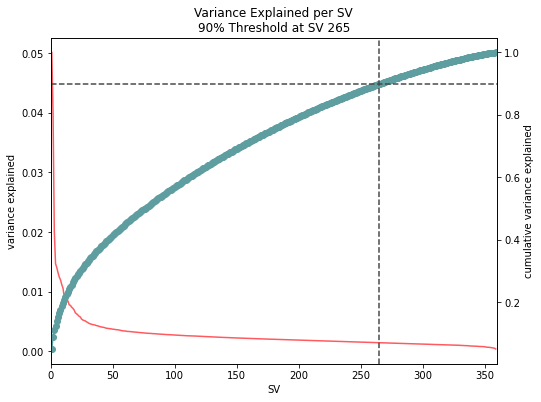

In [7]:
##########################################
### Temp script for lighter processing ###
main = df_labor#.sample(50)
##########################################

# main_feed = main.copy()
main_feed = main['Body'].copy()
sc_labor = Lab4(main_feed)

sc_labor.display_ve()

<b>Figure 6.</b> Variance and cumulative variance per SV for labor cases in the SC.

<b>Figure 6</b> above shows the variance explained by each SV as well as the cumulative variance. There were `424` singular values (SVs) obtained after performing truncated Singular Value Decomposition (SVD), and the authors chose `218` SVs to feed into the clustering algorithm, representing 90% of the explained variance.

Performing Latent Semantic Analysis on the corpus reveals the following graphs and insights:

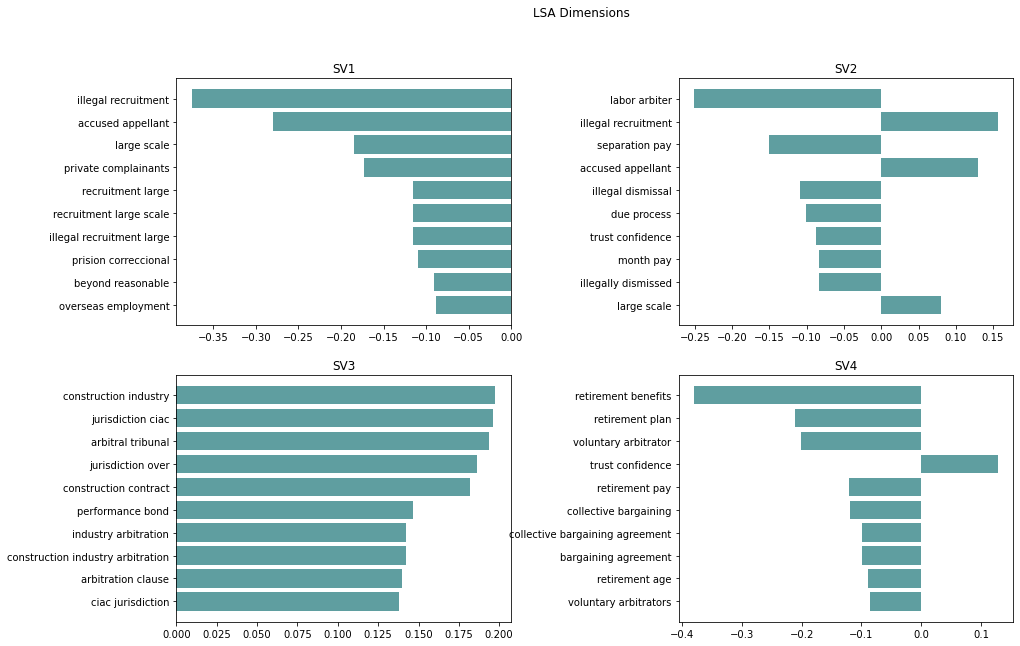

In [8]:
sc_labor.display_lsa()

<center><b>Figure 7.</b> Latent Semantic Analysis of the first 4 SVs for the SC cases on labor</center>

The LSA performed on the dataset surfaced common themes:
 - SV1 refers to <b>illegal recruitment</b>, which is a crime punishable by law. As mentioned earlier, apart from being prohibited by Art. 34 of the Labor Code, R.A. No. 8042 also prohibits illegal recruitment. The presence of the phrases "accused", "prision correccional" (imprisonment for a period between 6 months and 1 day to 6 years), and "beyond reasonable [doubt]" further point towards illegal recruitment as a crime.
 - SV2 shows strong correlations bewteen phraes that relate to <b>illegal dismissal of employees</b>. In such cases, it is the "labor arbiter" that decides the validity of termination by the employer, who may have invoked "[loss of] trust a[and] confidence" as a ground for termination. These phrases are negatively correlated to thehe concept of illegal recruitment as shown in SV1.
 - For SV3, the phrases refer to the <b>Construction Industry Arbitration Commission</b>, which provides for arbitration as a means to settle construction-related disputes,including labor-related construction disputes. Arbitration is only available if there is an "arbitration clause" in the contract relating to construction projects. This will be discussed in a bit more detail during the clusters below.
 - For SV4, the correlated words towards the left are mostly <b>retirement-related</b>: "retirement benefits", "retirement plan", "retirement age", and "retirement pay". It may be the case that "collective bargaining agreement"[s] between the employer and the labor union in the establishment may provide benefits relating to retirement, in addition to company policy.

### 5.2 Ward's method Agglomerative Clustering

The authors decided to use Ward's method for agglomerative, hierarchical clustering, because this method, coupled with consultation from people with domain knowledge could reveal insightful clusters from the SC Decisions depending on where the "cut" is made.

<b>Figure 8</b> below shows the dendrogram at delta (t) = 2.5, where as suggested by the authors' consulted domain experts, nine clusters emerged.

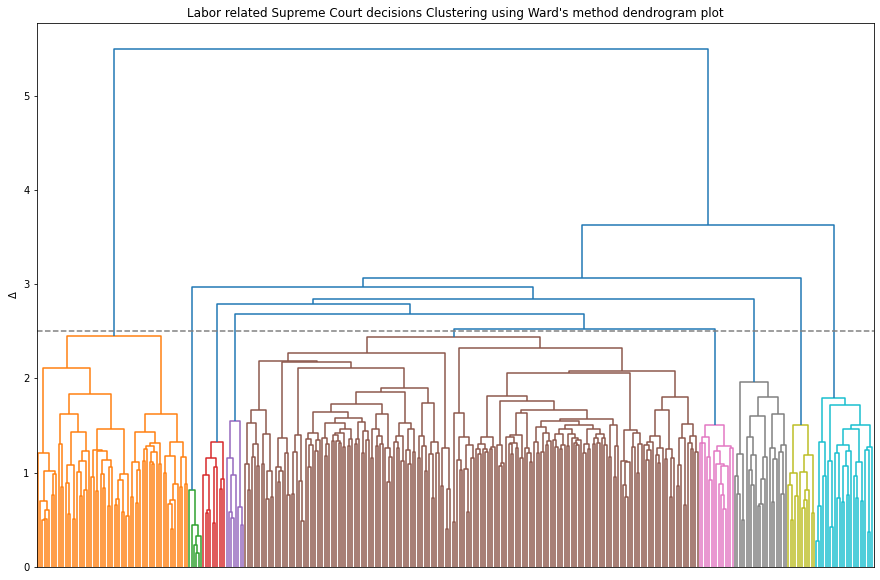

In [13]:
X_lc_new = sc_labor.bow_lc.dot(sc_labor.p_lc[:, :sc_labor.idx_90])
Z_wards = linkage(X_lc_new, method='ward', optimal_ordering=True)
best_t = 2.5
plot_dendrogram(Z_wards, best_t)

<center><b>Figure 8.</b> Labor related Supreme Court decisions Clustering using Ward's method dendrogram plot </center>

Each Decision is mapped on the scatterplot in <b>Figure 9</b> below. Looking at the scatterplot, it is apparent that there is one entire cluster comprising purple dots that are far apart from the rest of the members of the dataset. Comparing thse purple dots with the dendrogram above, however, it can be inferred that this relates to the orange cluster, which has the highest delta (i.e. distance) before it joins with the rest of the clusters.

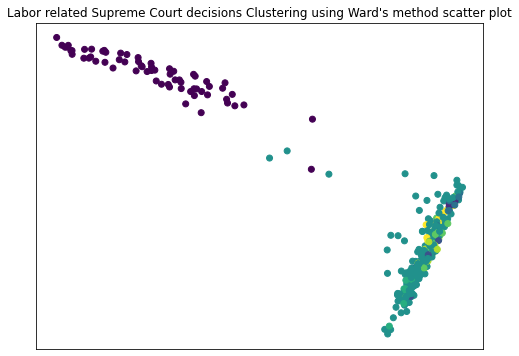

In [15]:
mapped_df = main.copy()
mapped_df.reset_index(drop=True, inplace=True)
y_predict_lc_wards = fcluster(Z_wards, t=best_t, criterion='distance')
mapped_df_wards = plot_scatter(X_lc_new, mapped_df, y_predict_lc_wards)

<b>Figure 9.</b> Labor related Supreme Court decisions Clustering using Ward's method scatter plot

The Table below shows the overview of the results of the clustering. The topics of each cluster are already indicated in the Table for convenience.

<center><b>Table 5.</b> Count of documents per Cluster using Ward's method Agglomerative Clustering

In [16]:
display(mapped_df_wards.groupby('y_predict', as_index=False).size()
        .rename(columns={'y_predict': 'cluster'}))

cluster  size
0        1    65
1        2     6
2        3    10
3        4     8
4        5   195
5        6    15
6        7    23
7        8    12
8        9    25

### 5.3  Clustering Results

At this point, The authors took the liberty of rearranging the clusters in order to create a story, so the clusters are not according to the order that the agglomerative clustering algorithm assigned.

In [17]:
c1_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 1, '#5F9EA0')
c2_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 2, '#5F9EA0')
c3_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 3, '#5F9EA0')
c4_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 4, '#5F9EA0')
c5_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 5, '#5F9EA0')
c6_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 6, '#5F9EA0')
c7_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 7, '#5F9EA0')
c8_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 8, '#5F9EA0')
c9_wordcloud = cluster_wordcloud(sc_labor, mapped_df_wards, 9, '#5F9EA0')

#### Stages of Employment

1. Protecting the prospective employee
   - Cluster 1: Illegal recruitment
   - Cluster 2: Labor-only contracting
2. During employment
    - Cluster 3: Labor organizations
    - Cluster 4: Disability benefits
3. Post-emplyoment
    - Cluster 5: Just cause for terminating employment: loss of trust and confidence
    - Cluster 6: Illegal dismissal
    - Cluster 7: Retirement
4. Other clusters
    - Cluster 8: Voluntary Arbitrators
    - Cluster 9: Construction Industry Arbitration Commission

#### Stage 1: Protecting the prospective employee

This stage contains the clusters relating to <b>illegal recruitment</b> and <b>labor-only contracting.</b>

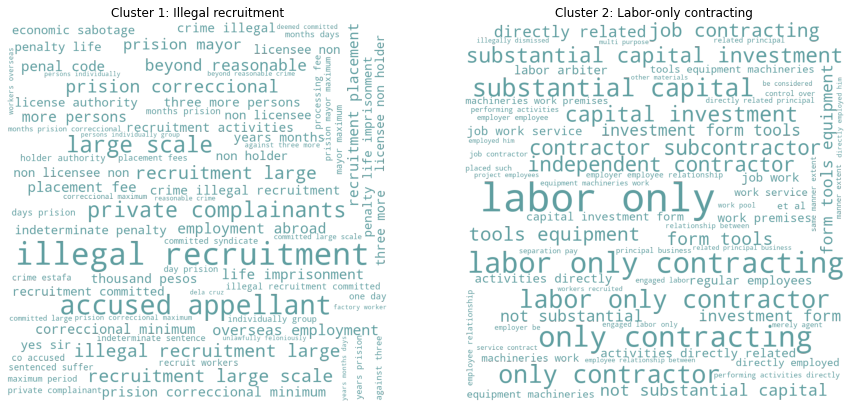

In [18]:
dual_wordcloud([c1_wordcloud, c3_wordcloud], [
               'Cluster 1: Illegal recruitment', 'Cluster 2: Labor-only contracting'])

<center><b>Figure 9.</b> WordCloud for Clusters 1 (illegal recruitment) and Cluster 2 (labor-only contracting).</center

#### Stage 2: During employment

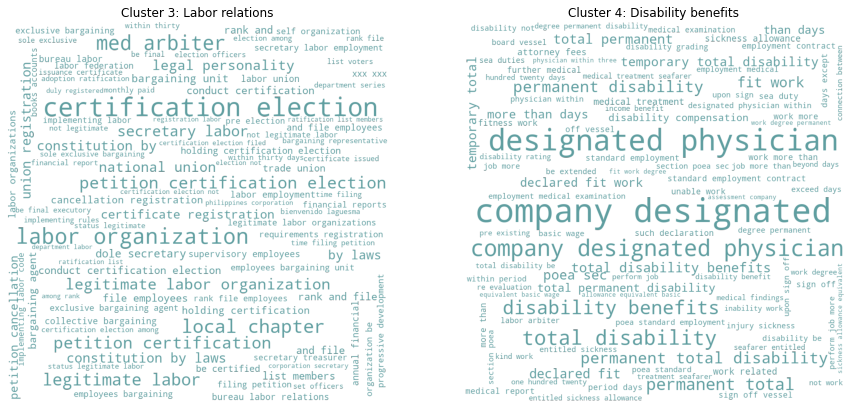

In [19]:
dual_wordcloud([c4_wordcloud, c2_wordcloud], [
               'Cluster 3: Labor relations', 'Cluster 4: Disability benefits'])

#### Stage 3: Post-employment

#### 3.a. Termination of Employment

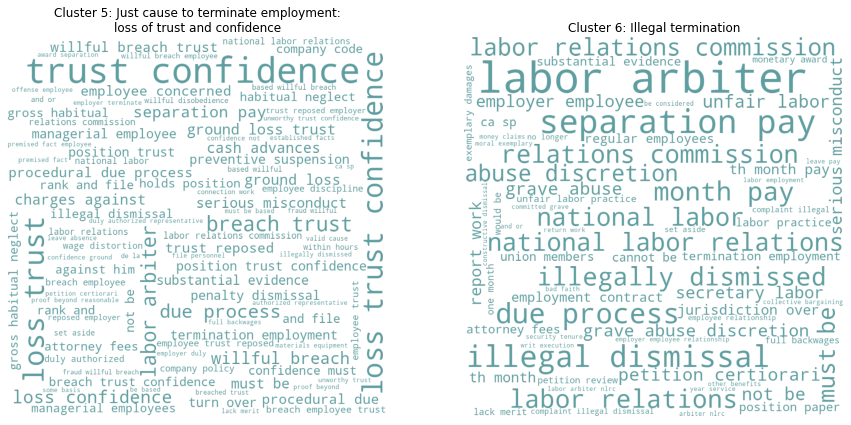

In [20]:
dual_wordcloud([c6_wordcloud, c5_wordcloud], [
               'Cluster 5: Just cause to terminate employment:\n'\
                'loss of trust and confidence', 'Cluster 6: Illegal termination'])

#### 3.b. Retirement from the service

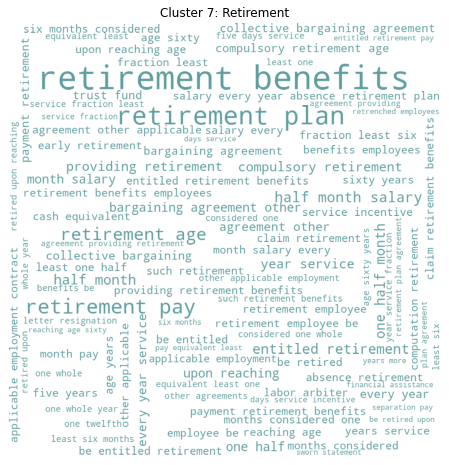

In [21]:
fig, ax = plt.subplots(figsize=(8, 8), facecolor=None)
ax.set_title('Cluster 7: Retirement')
ax.imshow(c8_wordcloud)
ax.axis("off")
plt.show()

#### Other Clusters

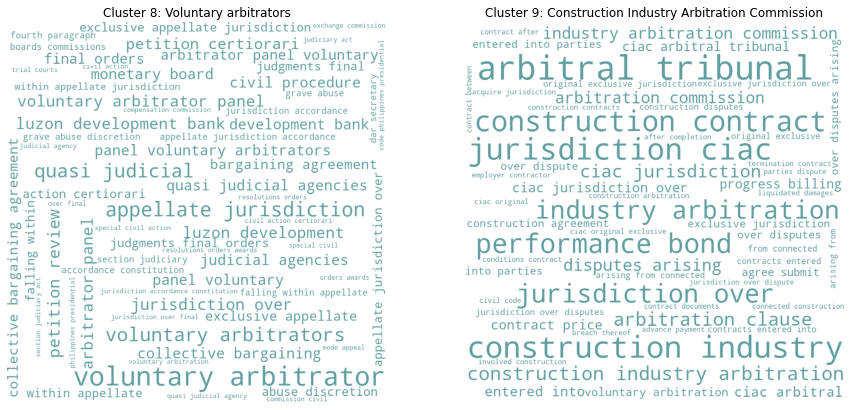

In [22]:
dual_wordcloud([c7_wordcloud, c9_wordcloud], [
               'Cluster 8: Voluntary arbitrators', 'Cluster 9: Construction Industry Arbitration Commission'])

## 6.0 Conclusion and Recommendations

### 6.1 Conclusion

TFIDF-LSA allows researchers to explore relationships between and among words found in documents in a corpus. Considering that there are many languages in the world each with their own words and grammatic construction, LSA helps people make connections between and among words, and can give insight not only to the semantics of languages, but also the culture of those who speak those languages.

The study in this report made great effort to understand the similarities and differences of English and French as found in Amazon Product reviews. Looking at Table 5 below shows the richness and uniqueness of the each language and the people that speak them.

<br>
<center><b>Table 5. Comparison of the topics of the first four SVs per `product_category` </b>

| product_category | English Review | French Review |
|:----------------:| :-----: | :-----: |
| apparel          | very small size of apparel | material (negative reviews) |
| home             | small rosettes | quality and price |
| wireless         | faulty screen protector (does not stick) | sending and delivery of the product |
    
</center>

Looking at Table 5 alone, it can be seen that the themes that give the most variance differ per category, per language. The SV1s by themselves already take the reader into the mind of the reviewer, and can tell a lot about the general population of Anglophone and Francophones, respectively. Performing LSA on a lot more documents and languages would give better insight about the similarities and differences of each person speaking either English and/or FRench.

As to the use of words in positive, negative, and neutral reviews, it is likewise interesting to see nuances in handling neutral reviews in that the Anglophones tend to go to either extreme ends, while Francophones use words to explore the spectrum in between the extremely positive and negative reviews.

### 6.2. Recommendations

#### 6.2.1. Explore other languages, categories

Insights may be gathered from performing a similar analysis and comparison with other languages. It would be interesting to see how speakers of other languages give reviews across different product categories, and how they word neutral, three star reviews.

Further study may be done in the "other" product category, like clustering, to see the general kinds of items being purchased and the kind and quality of reviews in the said category. Other categories in the dataset could be likewise explored.

#### 6.2.2. Explore explore country-specific reviews

Considering that the reviews are only language-level specific, more insights could be gathered if country-level reviews could be accessed. France may have different shopping and reviewing patterns than French-speaking Canada does, and from Amazon's standpoint, insights from this might give addition business value to the company and the sellers.

#### 6.2.3. Classify reviews

Although reviews are helpful in general to characterize a product being sold, they can serve their true purpose only if genuinely given. Thus, there is a need to determine which reviews provide authentic feedback, and which are only spam/feedback that barely offer any insight at all (e.g. "good" for a five-star review). For this reason, future studies may look into classifying reviews as being spam or ham/legitimate.

Moreover, the reviews could be classified as to reviews about the product, and reviews about the delivery. As seen in the earlier analysis, some SVs reveal topics relating to delivery or receipt of the product. More insights could be gathered if the reviews about the product and the service are classified.

#### 6.2.4. Compare with the way other e-commerce sites source reviews

In addition to asking for a plain text review, other e-commerce platforms like Shopee already provide clickable template answers for feedback (e.g. "excellent quality", "well packed", "item shipped immediately, "will order again"). Amazon may want to adopt similar feedback mechanisms in order to gain more consistent insights because the analysis done in this report reveals a wide range of feedback/sentiments across all reviews. This is particularly important for languages with words that have several meaning depending on context that a simple LSA might not accurately capture.

#### 6.2.5. Consider colloquial language and typographical errors

Further study must be done to take into consideration colloquial language used in the reviews as these may provide a rich wealth of insight as well. Words with typographical errors may be preprocessed also such that data from them are not drowned out by the words containing the proper spellings.

## 7.0 Acknowledgement


The authors would like to sincerely thank <strong><em>Prof. Christian Alis</em></strong> for his unwavering patience and dedication to continually mentor the team for the completion of this mini-project.

## 8.0 References

[1] Labor Code of the Philippines. Retrieved from https://blr.dole.gov.ph/2014/12/11/labor-code-of-the-philippines/. 
[2] World Bank . "Population ages 15–64”. Retrieved from: https://data.worldbank.org.
[3] J. Gavilan, M. Abad (2018). IN NUMBERS: What you need to know about the Philippine Labor Sector. https://www.rappler.com/newsbreak/iq/facts-labor-sector-philippines
[4] Unemployment worsens with 4.2 million jobless in February — PSA (2021). Retrieved from https://cnnphilippines.com/news/2021/3/30/PSA-unemployment-worsens-4.2-million-Filipinos-February.html
[5] 1987 Constitution, Article VIII, Section 1.
[6] Gatmaytan, D. (2014). Legal Method Essentials 2.0. UP College of Law
[7] 1997 Rules of Civil Procedure, Rule 1, Section 3.
[8] Kabigting vs. Acting Director of Prisons, G.R. No. L-15548, October 30, 1962.
[9] Civil code of the Philippines, Article 8.
[10] Gatmaytan, D., supra.
DOLE Department Advisory No. 1, series 2015 (Labor Code of the Philippines Renumbered).  Retrieved from: https://www.slideshare.net/GaryHeng1/dole-department-advisory-no-1-series-2015-labor-code-of-the-philippines-renumbered. 
[7] A.M. No. 10-4-20-SC. Internal Rules of the Supreme Court of the Philippines